In [597]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [598]:
df = pd.read_csv("nsl-kdd/KDDTrain+.txt")


In [599]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [600]:
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [601]:
df.nunique()


duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

# Data Preprocessing

In [602]:
# Changing outcomes to 0 for normal, 1 for penetration
df.loc[df['outcome'] == "normal", "outcome"] = 'normal'
df.loc[df['outcome'] != 'normal', "outcome"] = 'attack'
df.loc[df['outcome'] == "normal", "outcome"] = 0
df.loc[df['outcome'] != 0, "outcome"] = 1


In [603]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
df.drop(cat_cols, axis=1, inplace=True)
X = df.drop('outcome', axis=1)
Y = df['outcome']
Y = Y.astype('int')

In [604]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [605]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# x = pca.fit_transform(x)

In [606]:
np.save('scaled-input', x)

# Splitting

In [607]:
# nComp = 10
# topFeatureIndices = np.argsort(np.abs(pca.components_[:nComp]), axis=1)[:, ::-1]
# 
# originalFeatureNames = X.columns
# 
# selectedFeatures = [originalFeatureNames[i] for i in topFeatureIndices.ravel()]
# 
# for feature in selectedFeatures[:nComp]:
#     print(feature)

In [608]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)

In [609]:
x_train.shape

(100777, 35)

In [610]:
x_test.shape

(25195, 35)

# Model Training

In [611]:
from sklearn import metrics

kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = {"train_accuracy": train_accuracy, "test_accuracy": test_accuracy, "train_precision": train_precision, "test_precision": test_precision, 
                               "train_recall": train_recall, "test_recall": test_recall, "train_f1": train_f1, "test_f1": test_f1}
    
    print(name)
    print(f"Train accuracy: {train_accuracy * 100}, Test Accuracy: {test_accuracy*100}")
    print(f"Train Precision: {train_precision * 100}, Test Precision: {test_precision*100}")
    print(f"Train Recall: {train_recall * 100}, Test Recall: {test_recall*100}")
    print(f"Train F1 Score: {train_f1 * 100}, Test F1 Score: {test_f1*100}")
    
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    

DecisionTreeClassifier
Train accuracy: 100.0, Test Accuracy: 99.91268108751737
Train Precision: 100.0, Test Precision: 99.87193716383506
Train Recall: 100.0, Test Recall: 99.94019649722341
Train F1 Score: 100.0, Test F1 Score: 99.9060551712358


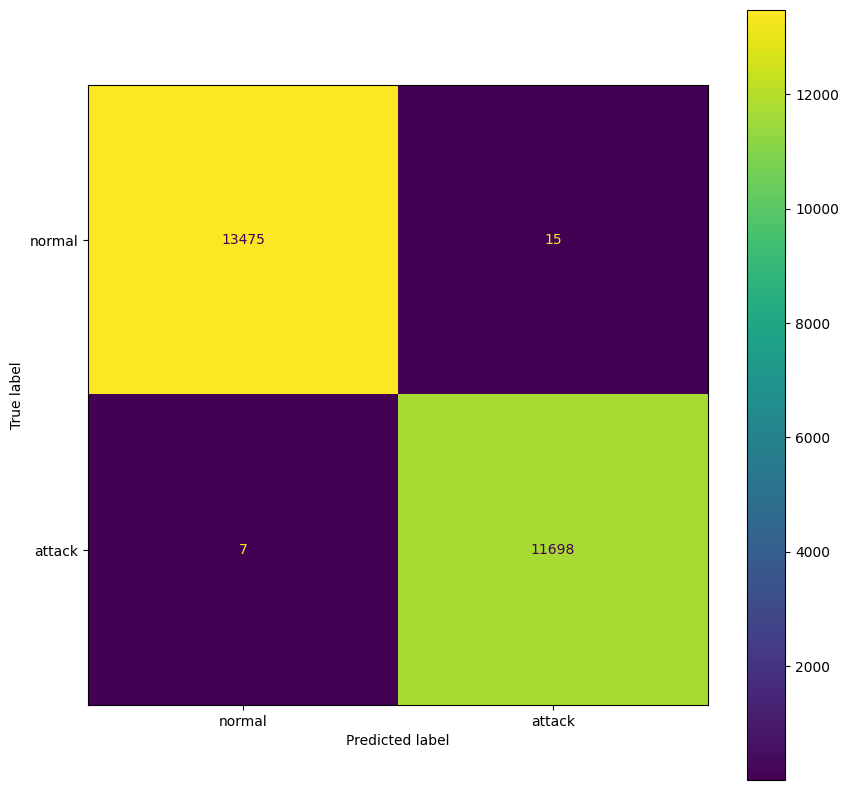

In [612]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
evaluate_classification(model, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

KNeighborsClassifier
Train accuracy: 100.0, Test Accuracy: 99.86505258979956
Train Precision: 100.0, Test Precision: 99.88033165227797
Train Recall: 100.0, Test Recall: 99.82913284920973
Train F1 Score: 100.0, Test F1 Score: 99.85472568791658


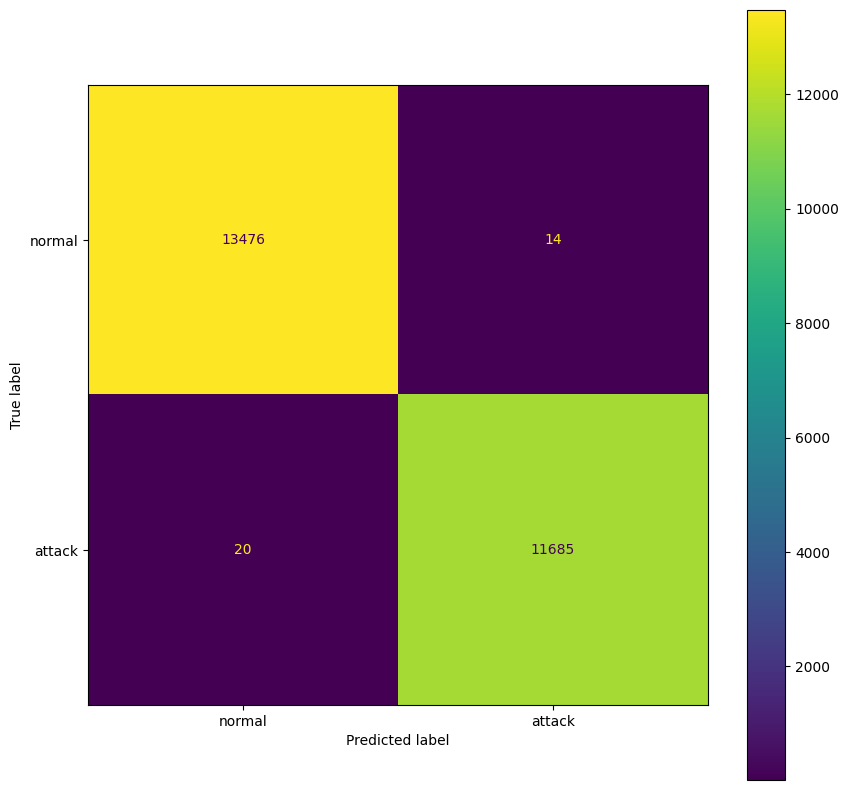

In [613]:
knn_model = KNeighborsClassifier(n_jobs=-1, leaf_size=50, weights='distance')
knn_model.fit(x_train, y_train)
evaluate_classification(knn_model, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

In [614]:
for i in kernal_evals.keys():
    print(i)
    for j in kernal_evals[i].keys():
        print(j, kernal_evals[i][j])
    print()

DecisionTreeClassifier
train_accuracy 1.0
test_accuracy 0.9991268108751736
train_precision 1.0
test_precision 0.9987193716383506
train_recall 1.0
test_recall 0.9994019649722341
train_f1 1.0
test_f1 0.9990605517123581

KNeighborsClassifier
train_accuracy 1.0
test_accuracy 0.9986505258979956
train_precision 1.0
test_precision 0.9988033165227798
train_recall 1.0
test_recall 0.9982913284920973
train_f1 1.0
test_f1 0.9985472568791659


In [615]:
for i in columns:
    if i not in cat_cols:
        print(i)

duration
src_bytes
dst_bytes
wrong_fragment
urgent
hot
num_failed_logins
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
outcome
level


# Saving Model

In [616]:
import pickle
def save_model(model, filename):
    pickle.dump(model, open(f"{filename}.sav", 'wb'))

In [617]:
save_model(knn_model, "KNN")
save_model(model, "DecisionTreeClassifier")

# Loading the test dataset and testing our model

In [640]:
dataset = pd.read_csv("nsl-kdd/KDDTest+.txt")
dataset.columns = columns

dataset.loc[dataset['outcome'] == "normal", "outcome"] = 'normal'
dataset.loc[dataset['outcome'] != "normal", "outcome"] = 'attack'

dataset.loc[dataset['outcome'] == "normal", "outcome"] = 0
dataset.loc[dataset['outcome'] != 0 , "outcome"] = 1

Y_data = dataset['outcome'].astype('int')
dataset.drop(cat_cols, axis=1, inplace=True)
X_data = dataset.drop('outcome', axis=1)

x_data = sc.fit_transform(X_data)
# x_data = pca.fit_transform(x_data)
X_train, X_test, Y_train, Y_test = train_test_split(x_data, Y_data, test_size=0.5)

KNeighborsClassifier
Train accuracy: 77.18037441220832, Test Accuracy: 77.21788502484031
Train Precision: 92.82178217821783, Test Precision: 92.7032967032967
Train Recall: 64.67544684854187, Test Recall: 65.35481871707468
Train F1 Score: 76.23359822583626, Test F1 Score: 76.66303162486369


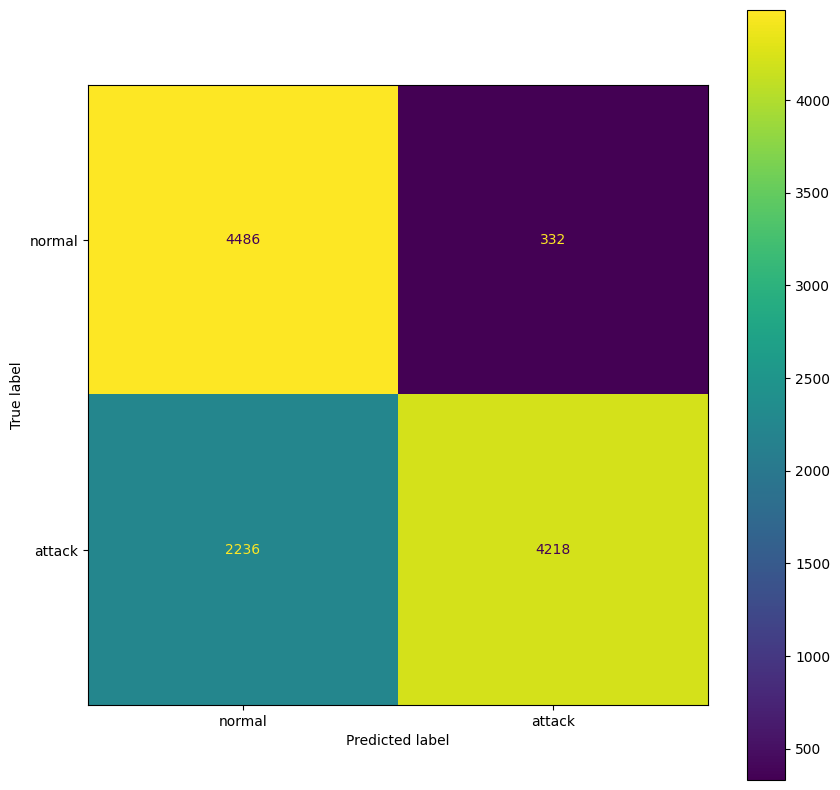

In [641]:
evaluate_classification(knn_model, "KNeighborsClassifier", X_train, X_test, Y_train, Y_test)

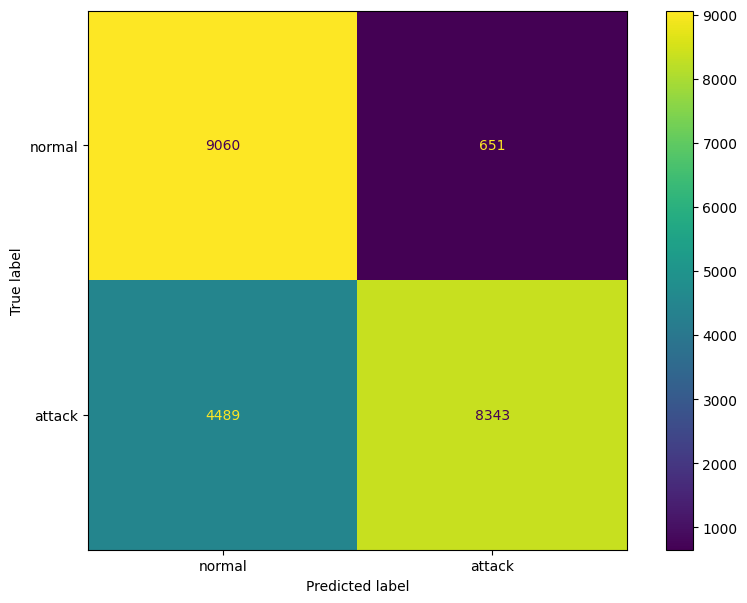

In [643]:
actual = Y_data
predicted = knn_model.predict(x_data)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

fig, ax = plt.subplots(figsize=(10,7))
ax.grid(False)
cm_display.plot(ax=ax)